In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


In [ ]:
# list past copies
!ls -lh | grep "DSP 461 Project"

# delete past copies uploaded
!rm -f DSP\ 461\ Project*.csv

-rw-r--r-- 1 root root 485K Nov 25 09:13 DSP 461 Project.csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving DSP 461 Project.csv to DSP 461 Project.csv


#### Load in the Data

In [ ]:
import pandas as pd

df = pd.read_csv("DSP 461 Project.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### Clean the Data

In [ ]:
# make new decoded df

df_decoded = df.copy()

#### Decoded Data using program created by ChatGPT

In [ ]:
# === 1️⃣ Define decoding maps ===

decode_maps = {
    "Marital status": {
        1: "single", 2: "married", 3: "widower", 4: "divorced",
        5: "facto union", 6: "legally separated"
    },
    "Application mode": {
        1: "1st phase - general contingent",
        2: "Ordinance No. 612/93",
        5: "1st phase - special contingent (Azores Island)",
        7: "Holders of other higher courses",
        10: "Ordinance No. 854-B/99",
        15: "International student (bachelor)",
        16: "1st phase - special contingent (Madeira Island)",
        17: "2nd phase - general contingent",
        18: "3rd phase - general contingent",
        26: "Ordinance No. 533-A/99, item b2 (Different Plan)",
        27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
        39: "Over 23 years old",
        42: "Transfer",
        43: "Change of course",
        44: "Technological specialization diploma holders",
        51: "Change of institution/course",
        53: "Short cycle diploma holders",
        57: "Change of institution/course (International)"
    },
    "Application order": {
        0: "first choice", 1: "second choice", 2: "third choice",
        3: "fourth choice", 4: "fifth choice", 5: "sixth choice",
        6: "seventh choice", 7: "eighth choice", 8: "ninth choice", 9: "tenth choice"
    },
    "Course": {
        33: "Biofuel Production Technologies",
        171: "Animation and Multimedia Design",
        8014: "Social Service (evening attendance)",
        9003: "Agronomy",
        9070: "Communication Design",
        9085: "Veterinary Nursing",
        9119: "Informatics Engineering",
        9130: "Equinculture",
        9147: "Management",
        9238: "Social Service",
        9254: "Tourism",
        9500: "Nursing",
        9556: "Oral Hygiene",
        9670: "Advertising and Marketing Management",
        9773: "Journalism and Communication",
        9853: "Basic Education",
        9991: "Management (evening attendance)"
    },
    "Daytime/evening attendance": {1: "daytime", 0: "evening"},
    "Previous qualification": {
        1: "Secondary education",
        2: "Higher education - bachelor's degree",
        3: "Higher education - degree",
        4: "Higher education - master's",
        5: "Higher education - doctorate",
        6: "Frequency of higher education",
        9: "12th year not completed",
        10: "11th year not completed",
        12: "Other - 11th year schooling",
        14: "10th year schooling",
        15: "10th year not completed",
        19: "Basic education 3rd cycle",
        38: "Basic education 2nd cycle",
        39: "Technological specialization course",
        40: "Higher education - degree (1st cycle)",
        42: "Professional higher technical course",
        43: "Higher education - master (2nd cycle)"
    },
    "Mother's qualification": {
        1: "Secondary education - 12th year",
        2: "Higher education - bachelor's degree",
        3: "Higher education - degree",
        4: "Higher education - master's",
        5: "Higher education - doctorate",
        6: "Frequency of higher education",
        9: "12th year not completed",
        10: "11th year not completed",
        12: "Other - 11th year schooling",
        14: "10th year schooling",
        15: "10th year not completed",
        19: "Basic education 3rd cycle",
        22: "Basic education 1st cycle",
        26: "Can’t read or write",
        27: "Can read without formal education",
        29: "Unknown",
        30: "Other",
        38: "Basic education 2nd cycle",
        39: "Technological specialization course",
        40: "Higher education - degree (1st cycle)",
        41: "Higher education - master (2nd cycle)",
        42: "Professional higher technical course"
    },
    "Father's qualification": {
        1: "Secondary education - 12th year",
        2: "Higher education - bachelor's degree",
        3: "Higher education - degree",
        4: "Higher education - master's",
        5: "Higher education - doctorate",
        6: "Frequency of higher education",
        9: "12th year not completed",
        10: "11th year not completed",
        12: "Other - 11th year schooling",
        14: "10th year schooling",
        15: "10th year not completed",
        19: "Basic education 3rd cycle",
        22: "Basic education 1st cycle",
        26: "Can’t read or write",
        27: "Can read without formal education",
        29: "Unknown",
        30: "Other",
        38: "Basic education 2nd cycle",
        39: "Technological specialization course",
        40: "Higher education - degree (1st cycle)",
        41: "Higher education - master (2nd cycle)",
        42: "Professional higher technical course"
    },
    "Mother's occupation": {
        0: "Student", 1: "Representatives of the Legislative Power, Executive Bodies, Directors, Managers",
        2: "Specialists in intellectual and scientific activities",
        3: "Intermediate level technicians and professions",
        4: "Administrative staff",
        5: "Personal services, security, and safety workers and sellers",
        6: "Farmers and skilled workers in agriculture, fisheries, and forests",
        7: "Skilled workers in industry, construction, and craftsmen",
        8: "Machine operators and assembly workers",
        9: "Unskilled workers",
        10: "Armed Forces Professions",
        90: "Other Situation",
        99: "Unknown"
    },
    "Father's occupation": {
        0: "Student", 1: "Representatives of the Legislative Power, Executive Bodies, Directors, Managers",
        2: "Specialists in intellectual and scientific activities",
        3: "Intermediate level technicians and professions",
        4: "Administrative staff",
        5: "Personal services, security, and safety workers and sellers",
        6: "Farmers and skilled workers in agriculture, fisheries, and forests",
        7: "Skilled workers in industry, construction, and craftsmen",
        8: "Machine operators and assembly workers",
        9: "Unskilled workers",
        10: "Armed Forces Professions",
        90: "Other Situation",
        99: "Unknown"
    },
    "Gender": {1: "male", 0: "female"}
}

# === 2️⃣ Apply categorical decodings directly to df ===
for col, mapping in decode_maps.items():
    if col in df_decoded.columns:
        df_decoded[col] = df_decoded[col].replace(mapping)

# === 3️⃣ Convert Yes/No numeric columns to booleans ===
bool_columns = [
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "International"
]

for col in bool_columns:
    if col in df_decoded.columns:
        df_decoded[col] = df_decoded[col].replace({1: True, 0: False}).astype(bool)

/tmp/ipython-input-1137553880.py:168: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_decoded[col] = df_decoded[col].replace({1: True, 0: False}).astype(bool)
/tmp/ipython-input-1137553880.py:168: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_decoded[col] = df_decoded[col].replace({1: True, 0: False}).astype(bool)
/tmp/ipython-input-1137553880.py:168: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

#### Translate the df and check that it worked

In [ ]:
df_decoded.to_csv("DSP 461 Project.csv", index=False)
df_decoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   object 
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   object 
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   object 
 9   Father's qualification                   

### Visualizations of Variables With Target

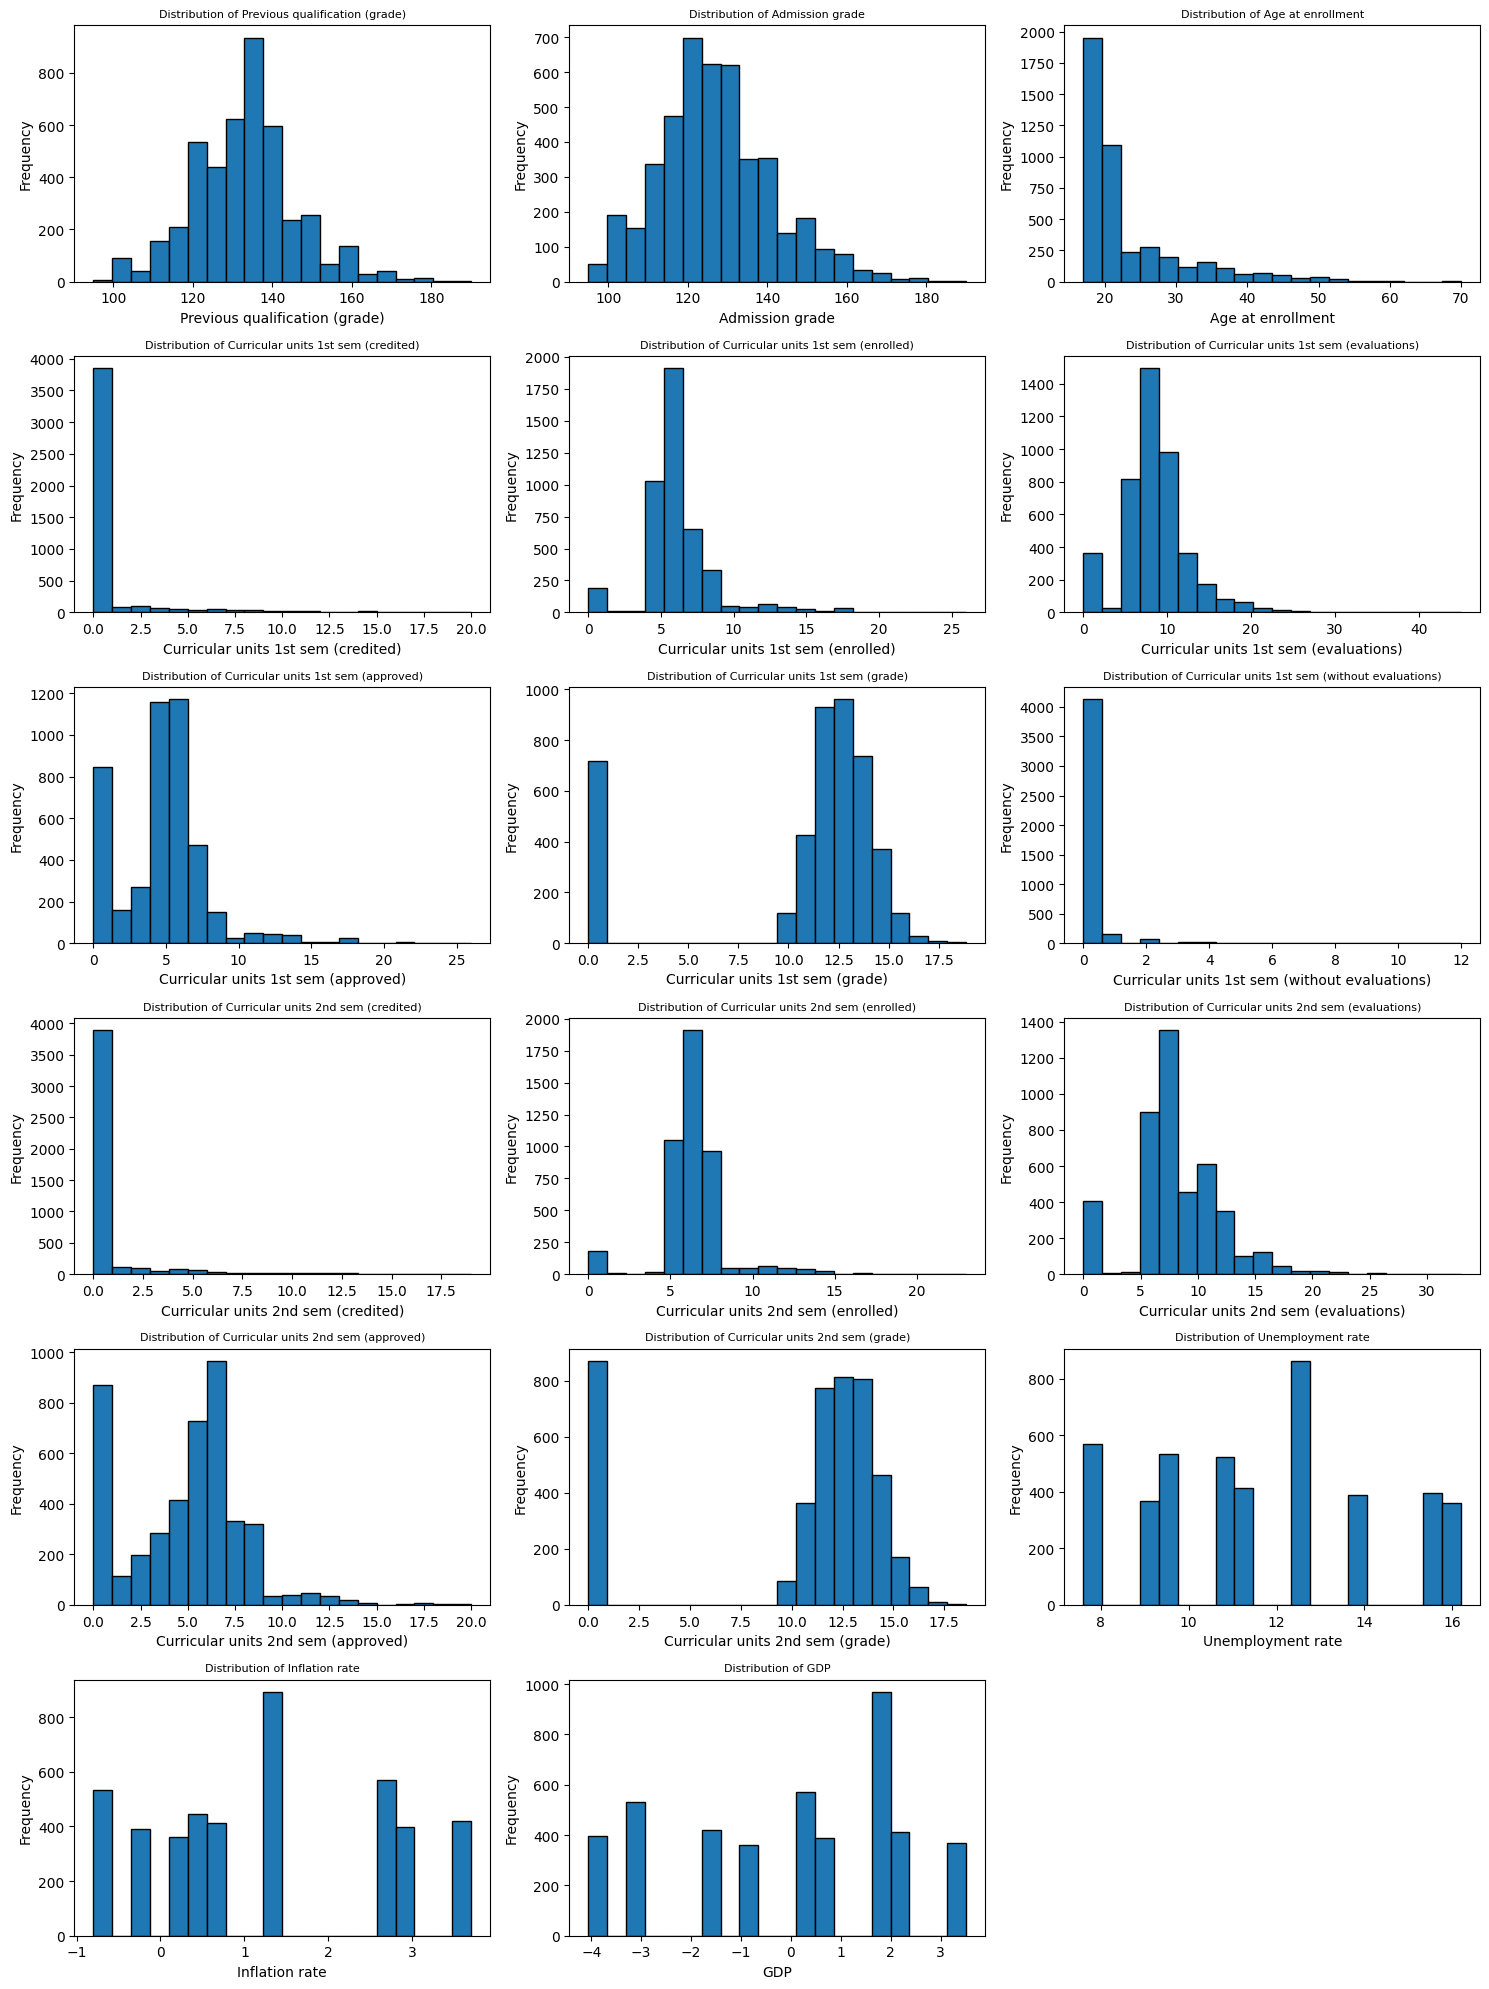

In [ ]:
quantitative_columns = [
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)", # Corrected from 'grade evaluations'
    "Unemployment rate",
    "Inflation rate",
    "GDP"
    ]

plt.figure(figsize=(15, 20))
i = -1
for col in quantitative_columns:
    if col in df.columns:
        i+=1
        plt.subplot(6, 3, i + 1)
        plt.hist(df[col], bins=20, edgecolor='k')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.title(f"Distribution of {col}", fontsize = 8)
plt.tight_layout()
plt.show()

/tmp/ipython-input-530639879.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plotting, labels=target, patch_artist=True, vert=False)
/tmp/ipython-input-530639879.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plotting, labels=target, patch_artist=True, vert=False)
/tmp/ipython-input-530639879.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plotting, labels=target, patch_artist=True, vert=False)
/tmp/ipython-input-530639879.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old 

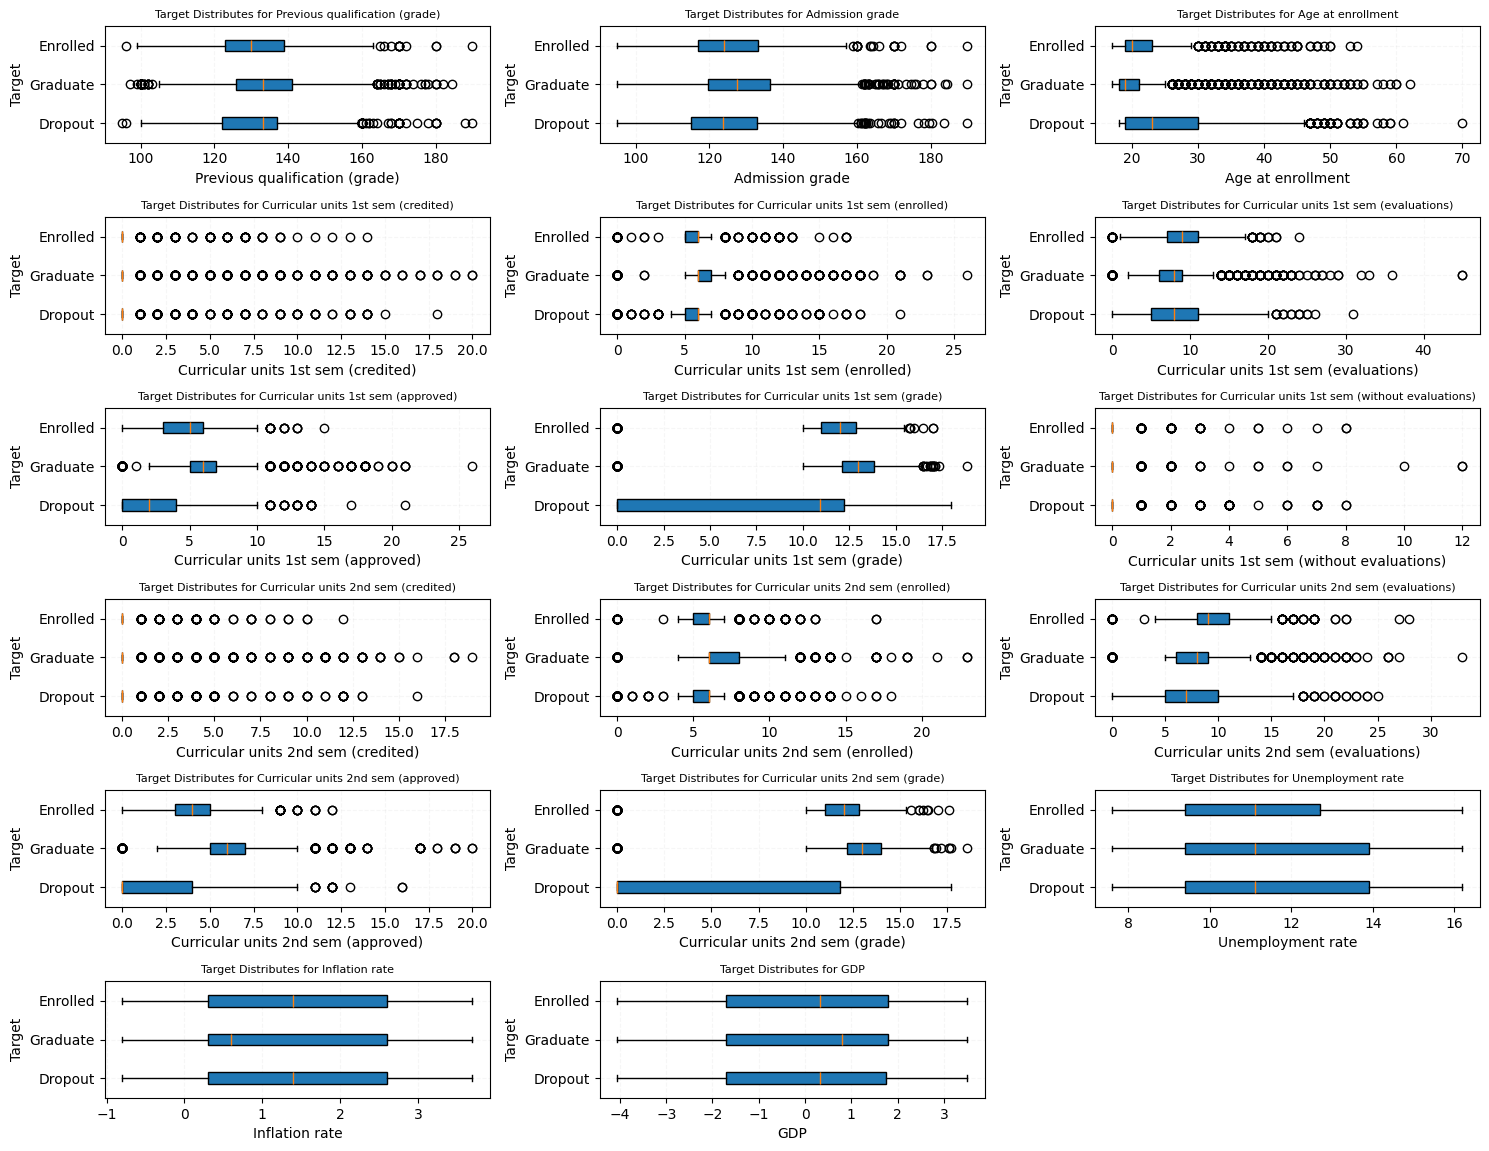

In [ ]:
circ_units = [
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)"]

plt.figure(figsize=(15, 15))
i = -1
target = df["Target"].unique()
for col in quantitative_columns:
    if col in df.columns:
        i+=1
        plt.subplot(8, 3, i + 1)
        plotting = [df[df['Target'] == t][col] for t in target]

        plt.boxplot(plotting, labels=target, patch_artist=True, vert=False)

        plt.title("Target Distributes for " + col, fontsize = 8)
        plt.ylabel("Target")
        plt.xlabel(col)
        plt.grid(True, linestyle="--", alpha=0.1)
plt.tight_layout()
plt.show()

In [ ]:
quantitative_columns = [
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
    ]

# plt.figure(figsize=(15, 10))
# i = -1
# for col in quantitative_columns:
#     if col in df.columns:
#         i+=1
#         plt.subplot(5, 4, i + 1)
#         plt.scatter(df[col], bins=20, edgecolor='k')
#         plt.xlabel(col)
#         plt.ylabel("Frequency")
#         plt.title(f"Distribution of {col}", fontsize = 8)
# plt.tight_layout()
# plt.show()

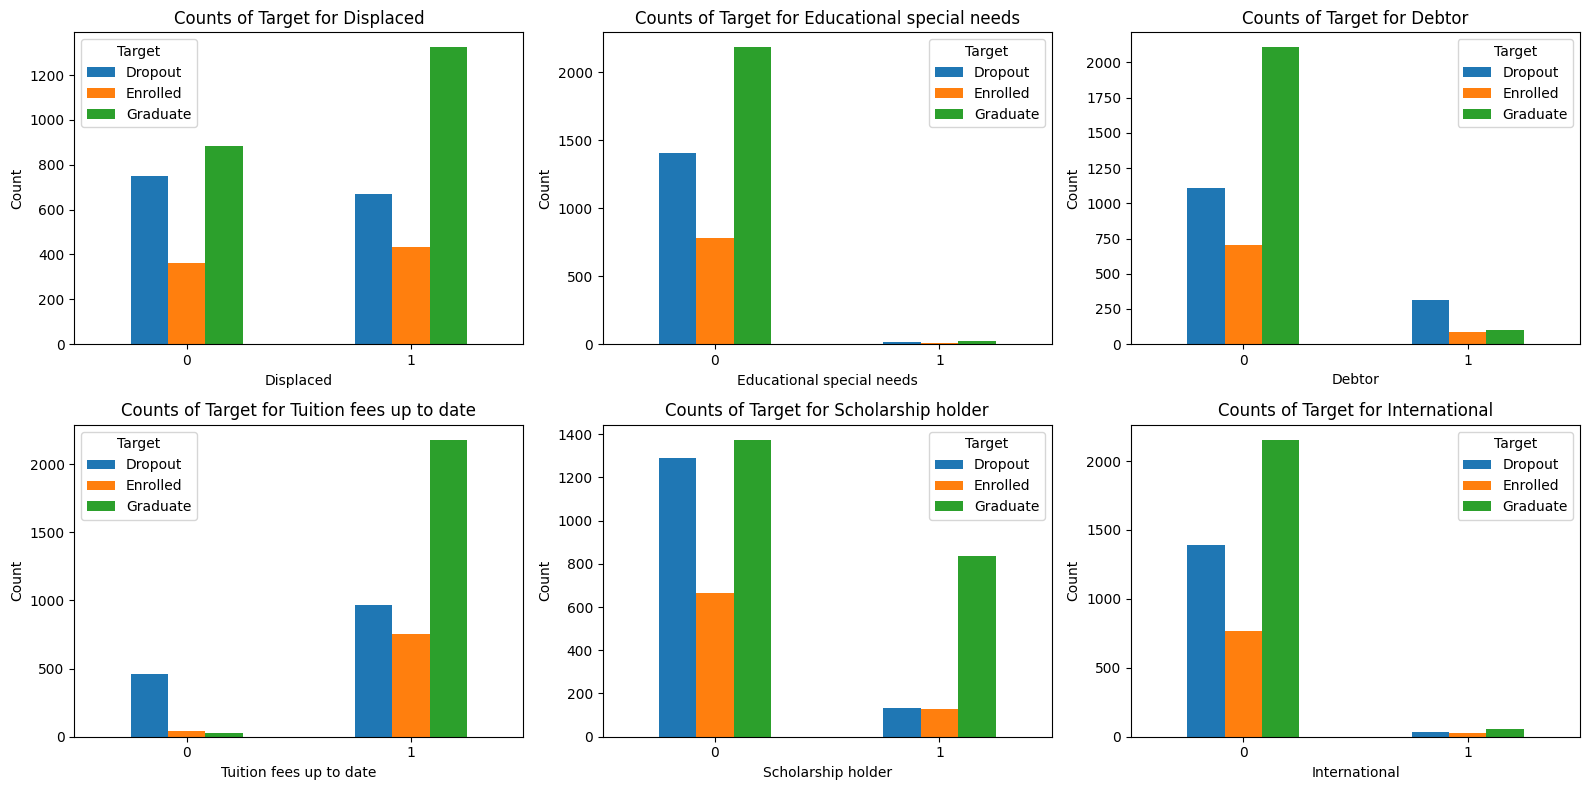

In [ ]:
plt.figure(figsize=(16, 8))
i = -1
for col in bool_columns:
    if col in df.columns:
        i+=1
        plt.subplot(2, 3, i + 1)
        bool_col = col
        target_col = "Target"

        # Group by Displaced and Target, then count
        counts = df.groupby([bool_col, target_col]).size().unstack(fill_value=0)

        counts.plot(kind='bar', stacked=False, ax=plt.gca())

        plt.xlabel(bool_col)
        plt.ylabel("Count")
        plt.title(f"Counts of {target_col} for {bool_col}")
        plt.xticks(rotation=0)
        plt.legend(title=target_col)
plt.tight_layout()
plt.show()

In [ ]:
df_decoded[quantitative_columns].describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,8.063291,0.150316,11.566139,1.228029,0.001969
std,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,3.947951,0.753774,2.663850,1.382711,2.269935
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,6.000000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,8.000000,0.000000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,10.000000,0.000000,13.900000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,33.000000,12.000000,16.200000,3.700000,3.510000


# The Experiments

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression

### Making the different datasets for `Target`

In [ ]:
# df with combined variables
df_binary = df.copy(deep=True)
df_binary["Target"] = df_binary["Target"].replace({"Enrolled": "Graduate"})

In [ ]:
# df with no "Enrolled" target variable
df_no_enrolled = df.copy(deep=True)
df_no_enrolled = df_no_enrolled.drop(df_no_enrolled[df_no_enrolled["Target"] == "Enrolled"].index)

In [ ]:
# Key columns
key_columns = [
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (without evaluations)",
    "Target"
    ]
# X = df.drop("Target", axis=1)  # drop target column
df_keys = df[key_columns]
df_keys = df_keys.drop(df_keys[df_keys["Target"] == "Enrolled"].index)

### AdaBoost

#### CV

In [ ]:
from sklearn.preprocessing import StandardScaler
def AB_best_CV(df_):
    # parameter grid
    param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1, 10]
    }
    df_ = df_.copy()

    # Encode target
    df_["Target"] = df_["Target"].map({"Graduate": 0, "Dropout": 1})

    # Separate X and y
    y = df_["Target"]
    X = df_.drop("Target", axis=1)


    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    base_learner = DecisionTreeClassifier(max_depth=1)
    ada = AdaBoostClassifier(estimator=base_learner, n_estimators=10, random_state=42)

    grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

In [ ]:
AB_best_param_bin = AB_best_CV(df_binary)
AB_best_param_no_enr = AB_best_CV(df_no_enrolled)
AB_best_param_keys = AB_best_CV(df_keys)

In [ ]:
print("Binary: ", AB_best_param_bin)
print("No Enrolled: ", AB_best_param_no_enr)
print("Keys: ", AB_best_param_keys)

Binary:  {'learning_rate': 1, 'n_estimators': 200}
No Enrolled:  {'learning_rate': 1, 'n_estimators': 200}
Keys:  {'learning_rate': 1, 'n_estimators': 150}


#### AdaBoost

In [ ]:
def AdaBoost(df_, est, LR):

    # Load dataset
    df_ = df_.copy()
    # df_["Target"] = df_["Target"].map({"Graduate": 0, "Dropout": 1})
    # Encode target
    df_["Target"] = df_["Target"].map({"Graduate": 0, "Dropout": 1})

    # Separate X and y
    y = df_["Target"]
    X = df_.drop("Target", axis=1)

    # One-hot encode categorical features
    X = pd.get_dummies(X, drop_first=True)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )



    # Use a decision stump as base learner
    base_learner = DecisionTreeClassifier(max_depth=1)
    ada = AdaBoostClassifier(estimator=base_learner, n_estimators=est, learning_rate=LR, random_state=42)

    # Train
    ada.fit(X_train, y_train)

    # Evaluate
    y_pred = ada.predict(X_test)

    # Model accuracy
    print("Library AdaBoost Accuracy:", accuracy_score(y_test, y_pred))

    # AUROC
    y_pred_proba = ada.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    print("AUROC:", roc_auc)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))




In [ ]:
AdaBoost(df_binary, 200, 1)
AdaBoost(df_no_enrolled, 200, 1)
AdaBoost(df_keys, 150, 1)

Library AdaBoost Accuracy: 0.8757062146892656
AUROC: 0.9292142204307374
[[564  37]
 [ 73 211]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       601
           1       0.85      0.74      0.79       284

    accuracy                           0.88       885
   macro avg       0.87      0.84      0.85       885
weighted avg       0.87      0.88      0.87       885

Library AdaBoost Accuracy: 0.9132231404958677
AUROC: 0.9640319291313493
[[417  25]
 [ 38 246]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       442
           1       0.91      0.87      0.89       284

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726

Library AdaBoost Accuracy: 0.9146005509641874
AUROC: 0.9640518450066917
[[419  23]
 [ 39 245]]
              precision    recall  f1-score   support

      

### Logistic Regression

In [104]:
from sklearn.preprocessing import StandardScaler
def LogReg_best_CV(df_):
    # parameter grid
    param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [50, 100, 150, 200, 500,1000,2000]
    }
    df_ = df_.copy()

    # Encode target
    df_["Target"] = df_["Target"].map({"Graduate": 0, "Dropout": 1})

    # Separate X and y
    y = df_["Target"]
    X = df_.drop("Target", axis=1)


    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    log_r = LogisticRegression(solver="lbfgs",random_state=42)

    grid_search = GridSearchCV(log_r, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

In [ ]:
log_best_param_bin = LogReg_best_CV(df_binary)
log_best_param_no_enr = LogReg_best_CV(df_no_enrolled)
log_best_param_keys = LogReg_best_CV(df_keys)

In [106]:
print("Binary: ", log_best_param_bin)
print("No Enrolled: ", log_best_param_no_enr)
print("Keys: ", log_best_param_keys)

Binary:  {'C': 0.1, 'max_iter': 2000, 'penalty': 'l2'}
No Enrolled:  {'C': 0.1, 'max_iter': 2000, 'penalty': 'l2'}
Keys:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}


Best Parameters Log Regression

In [102]:
def LogReg(df_, c, pen, max_it):
    # Load dataset
    df_ = df_.copy()

    #scale quantitative variables
    for col in quantitative_columns:
        if col in df_.columns:
            df_[col] = df_[col].astype(float)
            df_[col] = StandardScaler().fit_transform(df_[[col]])

    # df_["Target"] = df_["Target"].map({"Graduate": 0, "Dropout": 1})
    # Encode target
    df_["Target"] = df_["Target"].map({"Graduate": 0, "Dropout": 1})

    # Separate X and y
    y = df_["Target"]
    X = df_.drop("Target", axis=1)

    # One-hot encode categorical features
    X = pd.get_dummies(X, drop_first=True)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    log_r = LogisticRegression(C=c, penalty=pen, solver="lbfgs", max_iter=max_it,random_state=42)
    log_r.fit(X_train, y_train)

    y_pred = log_r.predict(X_test)
    print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

    #AUROC
    y_pred_proba = log_r.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    print("AUROC:", roc_auc)

    # confusion matrix and report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


In [107]:
LogReg(df_binary, log_best_param_bin["C"], log_best_param_bin["penalty"],
       log_best_param_bin["max_iter"])
LogReg(df_no_enrolled, log_best_param_no_enr["C"], log_best_param_no_enr["penalty"],
       log_best_param_no_enr["max_iter"])
LogReg(df_keys, log_best_param_keys["C"], log_best_param_keys["penalty"],
       log_best_param_keys["max_iter"])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8745762711864407
AUROC: 0.924784982775187
[[577  24]
 [ 87 197]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       601
           1       0.89      0.69      0.78       284

    accuracy                           0.87       885
   macro avg       0.88      0.83      0.85       885
weighted avg       0.88      0.87      0.87       885



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9325068870523416
AUROC: 0.9699588936332929
[[423  19]
 [ 30 254]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       442
           1       0.93      0.89      0.91       284

    accuracy                           0.93       726
   macro avg       0.93      0.93      0.93       726
weighted avg       0.93      0.93      0.93       726

Logistic Regression Accuracy: 0.9228650137741047
AUROC: 0.9705205213179529
[[417  25]
 [ 31 253]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       442
           1       0.91      0.89      0.90       284

    accuracy                           0.92       726
   macro avg       0.92      0.92      0.92       726
weighted avg       0.92      0.92      0.92       726



### Random Forest

#### CV Best Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def RF_best_CV(df_):
    # parameter grid
    param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20]
    }
    df_ = df_.copy()

    # Encode target
    df_["Target"] = df_["Target"].map({"Graduate": 0, "Dropout": 1})

    # Separate X and y
    y = df_["Target"]
    X = df_.drop("Target", axis=1)


    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    rf = RandomForestClassifier(random_state=42)

    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_


In [ ]:
best_param_bin = RF_best_CV(df_binary)
best_param_no_enr = RF_best_CV(df_no_enrolled)
best_param_keys = RF_best_CV(df_keys)

{'max_depth': 10, 'n_estimators': 50}

In [ ]:
print("Binary: ", best_param_bin)
print("No Enrolled: ", best_param_no_enr)
print("Keys: ", best_param_keys)

Binary:  {'max_depth': 15, 'n_estimators': 200}
No Enrolled:  {'max_depth': 15, 'n_estimators': 100}
Keys:  {'max_depth': 10, 'n_estimators': 50}


#### Information on forests

In [ ]:
def RF(df_, n_param, d, test):
    # Load dataset
    df_ = df_.copy()
    # df_["Target"] = df_["Target"].map({"Graduate": 0, "Dropout": 1})
    # Encode target
    df_["Target"] = df_["Target"].map({"Graduate": 0, "Dropout": 1})

    # Separate X and y
    y = df_["Target"]
    X = df_.drop("Target", axis=1)

    # One-hot encode categorical features
    X = pd.get_dummies(X, drop_first=True)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    rf = RandomForestClassifier(n_estimators=n_param, random_state=42, max_depth = d)
    rf.fit(X_train, y_train)
    rf_y_pred = rf.predict(X_test)

    accuracy = accuracy_score(y_test, rf_y_pred)

    #AUROC
    y_pred_proba = rf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    if (test  == True):
      return accuracy, roc_auc

    print("Random Forest Accuracy: ", accuracy)
    print("AUROC:", roc_auc)
    print(confusion_matrix(y_test, rf_y_pred))
    print(classification_report(y_test, rf_y_pred))

#### Manual Best Parameters

In [ ]:
n_p = [50, 100, 150, 200, 300, 400]
max_depth = [None, 5, 10, 15, 20]
df_list = [["df_binary",df_binary], ['df_no_enrolled',df_no_enrolled]]

values = []#dictionary for parameters, depth, and list
accuracy_AUROC_best = []
for par in n_p:
  for depth in max_depth:
    for df_name,df_version in df_list:
      accuracy, roc_auc = RF(df_version, par, depth, True)
      values.append([par, depth, df_name])
      accuracy_AUROC_best.append([accuracy, roc_auc])


In [ ]:
# Get the parameters for the best Random Forest
best_index = max(range(len(accuracy_AUROC_best)),
                 key=lambda i: accuracy_AUROC_best[i][1])

best_model_metrics = accuracy_AUROC_best[best_index]
best_params = values[best_index]

print("Accuracy:", best_model_metrics[0])
print("Best AUROC:", best_model_metrics[1])
print("Params:", best_params)


Accuracy: 0.9201101928374655
Best AUROC: 0.9725160920272767
Params: [50, 10, 'df_no_enrolled']


#### Results from best Forests

CV

In [ ]:
print("Best Parameters Binary: ", best_param_bin)
RF(df_binary, best_param_bin["n_estimators"], best_param_bin["max_depth"], False)

print("Best Parameters No Enrolled: ", best_param_no_enr)
RF(df_no_enrolled, best_param_no_enr["n_estimators"], best_param_no_enr["max_depth"], False)

print("Best Parameters Keys: ", best_param_keys)
RF(df_keys, best_param_keys["n_estimators"], best_param_keys["max_depth"], False)

Best Parameters Binary:  {'max_depth': 15, 'n_estimators': 200}
Random Forest Accuracy:  0.8824858757062147
AUROC: 0.9327353471913009
[[570  31]
 [ 73 211]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       601
           1       0.87      0.74      0.80       284

    accuracy                           0.88       885
   macro avg       0.88      0.85      0.86       885
weighted avg       0.88      0.88      0.88       885

Best Parameters No Enrolled:  {'max_depth': 15, 'n_estimators': 100}
Random Forest Accuracy:  0.9242424242424242
AUROC: 0.9708192594480912
[[420  22]
 [ 33 251]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       442
           1       0.92      0.88      0.90       284

    accuracy                           0.92       726
   macro avg       0.92      0.92      0.92       726
weighted avg       0.92      0.92      0.92       726

Best Parameters Keys:  {'ma

Manual

In [ ]:
# Get information of random forest based off of manual parameters
RF(df_no_enrolled, 50, 15, False)

Random Forest Accuracy:  0.9228650137741047
AUROC: 0.971627843986999
[[422  20]
 [ 36 248]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       442
           1       0.93      0.87      0.90       284

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.92       726
weighted avg       0.92      0.92      0.92       726

